# Implementing a 3 Layer Neural Network
In this exercise we will develop a neural network with fully-connected layers to perform classification, and test it out on the CIFAR-10 dataset.

In [2]:
# A bit of setup

import numpy as np
import matplotlib.pyplot as plt
import time

from three_layer_net import ThreeLayerNet

from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 8.0)        # Set default size of plots. Needed to load this cell twice.
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


We will use the class `TwoLayerNet` in the file `cs231n/classifiers/neural_net.py` to represent instances of our network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays. Below, we initialize toy data and a toy model that we will use to develop your implementation.

In [17]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4       # dimensionality D
hidden_size_1 = 10     # hidden layer number of neurons H
hidden_size_2 = 10
num_classes = 3      # output_size number of classes C
num_inputs = 5       # number of training records N
#
# input (4) - fully connected hidden layer (10) - ReLU - fully connected output layer (3) - softmax
#

def init_toy_model():
    np.random.seed(0)    # np.random.seed() makes the random numbers predictable. Same numbers are generated.
    return ThreeLayerNet(input_size, hidden_size_1, hidden_size_2, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)   # X: Input data of shape (N, D)
    y = np.array([0, 1, 2, 2, 1])
    #y = np.array([1, 1, 1, 0, 0, 1, 1, 0, 0, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

# Forward pass: compute scores
Open the file `cs231n/classifiers/neural_net.py` and look at the method `TwoLayerNet.loss`. This function is very similar to the loss functions you have written for the SVM and Softmax exercises: It takes the data and weights and computes the class scores, the loss, and the gradients on the parameters. 

Implement the first part of the forward pass which uses the weights and biases to compute the scores for all inputs.

In [20]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.03596154 -0.01613583 -0.00048556]
 [-0.09480192  0.20724618 -0.09763798]
 [-0.07015667  0.17081869 -0.07675745]
 [ 0.01473052  0.09321097 -0.0395178 ]
 [-0.05306489  0.04729807  0.01750587]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
8.616911318235552


# Forward pass: compute loss
In the same function, implement the second part that computes the data and regularizaion loss.

In [22]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133
print('loss %f' % (loss))

# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

loss 1.176067
Difference between your loss and correct loss:
0.1277211210284399


# Backward pass
Implement the rest of the function. This will compute the gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`. Now that you (hopefully!) have a correctly implemented forward pass, you can debug your backward pass using a numeric gradient check:

In [25]:
from cs231n.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W1 max relative error: 3.561318e-09
b1 max relative error: 7.670386e-09
W2 max relative error: 8.392072e-07
b2 max relative error: 4.590213e-10
W3 max relative error: 4.492384e-09
b3 max relative error: 8.494216e-11


# Train the network
To train the network we will use stochastic gradient descent (SGD), similar to the SVM and Softmax classifiers. Look at the function `TwoLayerNet.train` and fill in the missing sections to implement the training procedure. This should be very similar to the training procedure you used for the SVM and Softmax classifiers. You will also have to implement `TwoLayerNet.predict`, as the training process periodically performs prediction to keep track of accuracy over time while the network trains.

Once you have implemented the method, run the code below to train a two-layer network on toy data. You should achieve a training loss less than 0.2.

Final training loss:  0.5244440922995853


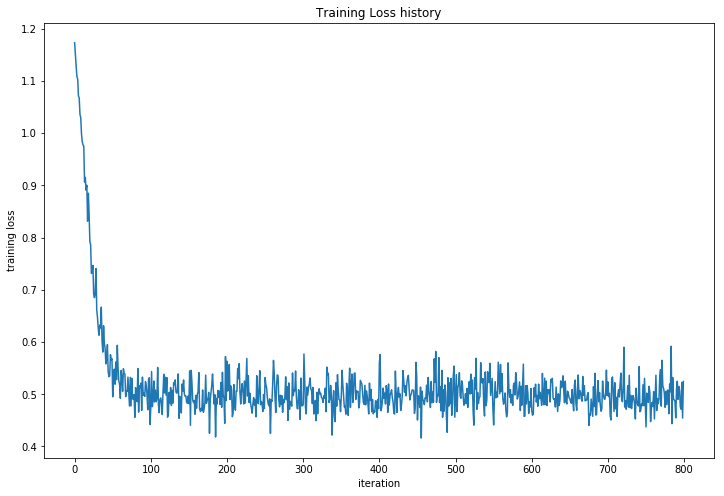

In [36]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=0.09, reg=5e-2,
            num_iters=800, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Load the data
Now that you have implemented a two-layer network that passes gradient checks and works on toy data, it's time to load up our favorite CIFAR-10 data so we can use it to train a classifier on a real dataset.

In [37]:
from cs231n.data_utils import load_CIFAR10

k = 0        # global used with PCA, number of principal components
U_train = 0  # global for applying PCA data restore

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Mean normalize the data
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image
    
    # Feature scale the data (not used with images)
    #sigma = np.std(X_train, axis = 0)
    #X_train /= sigma
    #X_val /= sigma
    #X_test /= sigma
    
    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)
    
    # PCA
    global U_train
    global k
    k = 3072
    #cov = np.dot(X_train.T, X_train) / X_train.shape[0]
    #U,S,V = np.linalg.svd(cov)
    #U_train = U                                          # storing U for image reconstruction
    #X_train_rot_reduced = np.dot(X_train, U[:,:k])       # X_train_rot_reduced becomes [N x k], top-k eigenvectors
    #X_train = X_train_rot_reduced                        # X_train_rot_reduced becomes the new X_train
    # Apply only the mapping of X_train U[:,:k] to val/test but do not PCA on val/test!
    #X_val_rot_reduced = np.dot(X_val, U_train[:,:k]) 
    #X_val = X_val_rot_reduced 
    #X_test_rot_reduced = np.dot(X_test, U_train[:,:k]) 
    #X_test = X_test_rot_reduced
    
    return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


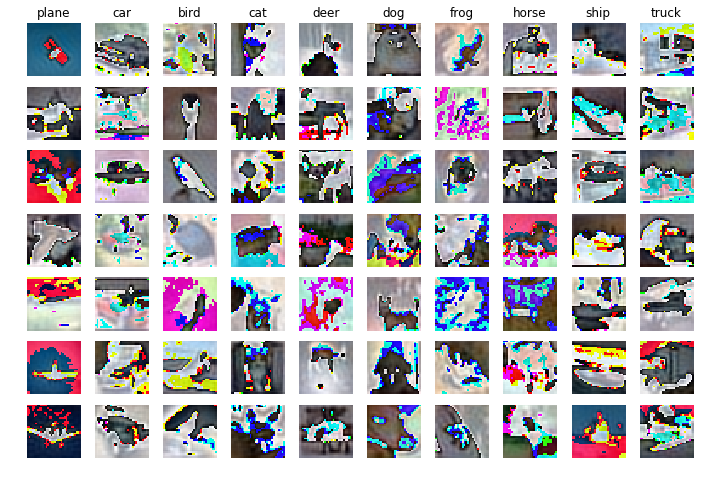

In [16]:
# Visualize some examples from the PCA reduced dataset.
# We show a few examples of training images from each class.
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    # idxs is an array of class elements matching the enumerator y
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        
        # Reconstruct the original image from the PCA X_train
        U_reduce = U_train[:,:k]
        X_train_rot_back = np.dot(X_train, U_reduce.T) 
        # need to reshape from (3072,) to (32, 32, 3)
        X_image = np.reshape(X_train_rot_back[idx], (32, 32, 3))
        
        plt.imshow(X_image.astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

## Sanity checking the network implementation with sub-sampled real data

iteration 0 / 1000: loss 2.302585
iteration 100 / 1000: loss 2.230252
iteration 200 / 1000: loss 2.183633
iteration 300 / 1000: loss 2.197307
iteration 400 / 1000: loss 2.195480
iteration 500 / 1000: loss 2.192933
iteration 600 / 1000: loss 2.204320
iteration 700 / 1000: loss 2.185080
iteration 800 / 1000: loss 2.186305
iteration 900 / 1000: loss 2.188120
Initial training loss (Softmax/CE expect: -ln(1/num_classes) = -ln(0.1) = 2.3026): 2.302585
Final training loss: 2.184592


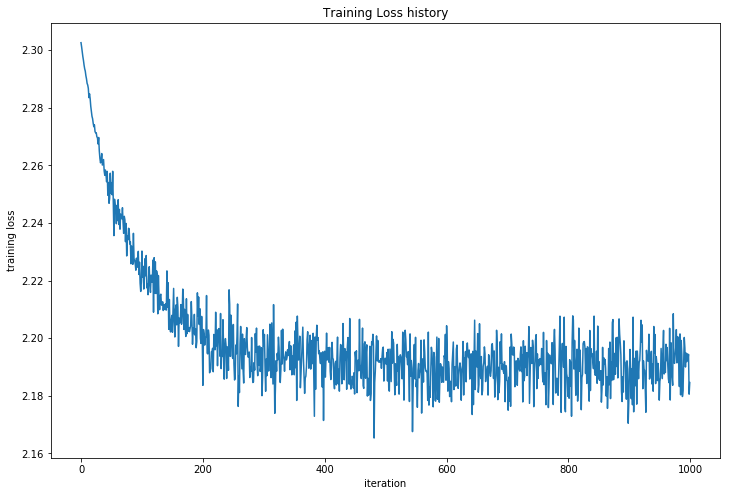

In [51]:
# Zero loss testing the network with 20 training examples (overfitting a tiny subset of data).
num_training_zero_loss = 20
num_validation_zero_loss = 10

mask = list(range(num_training_zero_loss))
X_train_zero_loss = X_train[mask]
y_train_zero_loss = y_train[mask]

mask = list(range(num_training_zero_loss, num_training_zero_loss + num_validation_zero_loss))
X_val_zero_loss = X_val[mask]
y_val_zero_loss = y_val[mask]

input_size = k
hidden_size_1 = 50
hidden_size_2 = 50
num_classes = 10

net = ThreeLayerNet(input_size, hidden_size_1, hidden_size_2, num_classes)
stats = net.train(X_train_zero_loss, y_train_zero_loss, X_val_zero_loss, y_val_zero_loss,
                  num_iters=1000, batch_size=500,
                  learning_rate=0.030, learning_rate_decay=0.99,
                  reg=0.0, verbose=True)

# Check if the initial loss is reasonable.
print('Initial training loss (Softmax/CE expect: -ln(1/num_classes) = -ln(0.1) = 2.3026): %f' 
      % (stats['loss_history'][0]))
print('Final training loss: %f' % (stats['loss_history'][-1]))

# Plot the loss function.
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Train a network
To train our network we will use SGD with momentum. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

In [97]:
#input_size = 32 * 32 * 3 # use without PCA, number of input dimensions
input_size = k            # use with PCA, intialize the parameter W1 with k (number of principal components)
hidden_size_1 = 50
hidden_size_2 = 50
num_classes = 10
net = ThreeLayerNet(input_size, hidden_size_1, hidden_size_2, num_classes)

t1 = time.time()

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=4000, batch_size=200,
            learning_rate=0.027, learning_rate_decay=0.95,
            reg=0.0, verbose=True)

t2 = time.time()

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: %f, computed in %fs' % (val_acc, t2 - t1))


iteration 0 / 4000: loss 2.302585
iteration 100 / 4000: loss 2.302707
iteration 200 / 4000: loss 2.303517
iteration 300 / 4000: loss 2.303722
iteration 400 / 4000: loss 2.302267
iteration 500 / 4000: loss 2.303367
iteration 600 / 4000: loss 2.302247
iteration 700 / 4000: loss 2.302345
iteration 800 / 4000: loss 2.141222
iteration 900 / 4000: loss 2.094340
iteration 1000 / 4000: loss 1.844792
iteration 1100 / 4000: loss 1.810735
iteration 1200 / 4000: loss 1.584172
iteration 1300 / 4000: loss 1.609592
iteration 1400 / 4000: loss 1.441797
iteration 1500 / 4000: loss 1.531987
iteration 1600 / 4000: loss 1.472874
iteration 1700 / 4000: loss 1.469654
iteration 1800 / 4000: loss 1.402246
iteration 1900 / 4000: loss 1.489883
iteration 2000 / 4000: loss 1.364579
iteration 2100 / 4000: loss 1.331702
iteration 2200 / 4000: loss 1.608961
iteration 2300 / 4000: loss 1.232868
iteration 2400 / 4000: loss 1.280915
iteration 2500 / 4000: loss 1.323743
iteration 2600 / 4000: loss 1.320478
iteration 270

# Debug the training
With the default parameters we provided above, you should get a validation accuracy of about 0.29 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

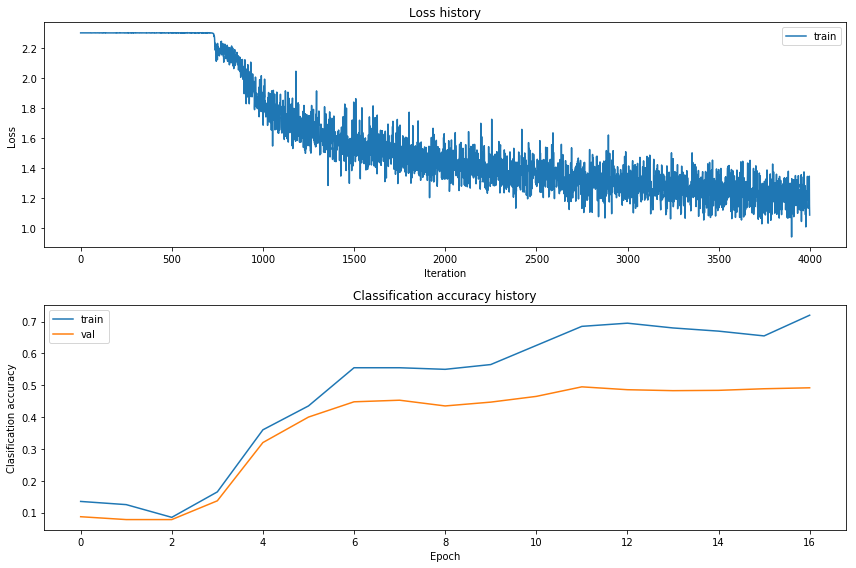

In [98]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'], label='train')
plt.legend()
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.legend()
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.tight_layout()                 # control extra padding around the figure border to avoid overlapping labels
plt.show()

## Debug the Ratio of weights:updates
The last quantity you might want to track is the ratio of the update magnitudes to the value magnitudes. Note: updates, not the raw gradients (e.g. in vanilla sgd this would be the gradient multiplied by the learning rate). You might want to evaluate and track this ratio for every set of parameters independently. A rough heuristic is that this ratio should be somewhere around 1e-3. If it is lower than this then the learning rate might be too low. If it is higher then the learning rate is likely too high.
### NOTE: The step function is because of Decay learning rate
            learning_rate *= learning_rate_decay

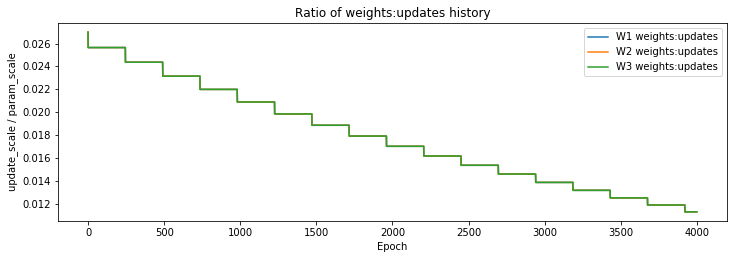

In [100]:
plt.subplot(2, 1, 2)
plt.plot(stats['weight_update_history_W1'], label='W1 weights:updates')
plt.plot(stats['weight_update_history_W2'], label='W2 weights:updates')
plt.plot(stats['weight_update_history_W3'], label='W3 weights:updates')
plt.legend()
plt.title('Ratio of weights:updates history')
plt.xlabel('Epoch')
plt.ylabel('update_scale / param_scale')
plt.show()

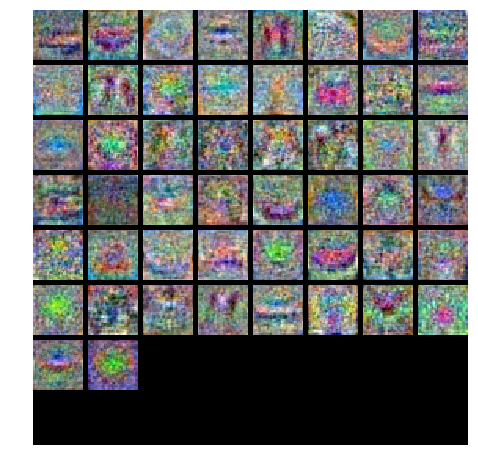

In [101]:
from cs231n.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)      # without PCA, the image dimension is 32*32*3=3072
    #W1 = W1.reshape(10, 10, 3, -1).transpose(3, 0, 1, 2)       # with PCA, reshape to 10*10*3=k; k=300
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

# Tune your hyperparameters

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength. You might also consider tuning the learning rate decay, but you should be able to get good performance using the default value.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 48% on the validation set. Our best network gets over 52% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on CIFAR-10 as you can, with a fully-connected Neural Network. For every 1% above 52% on the Test set we will award you with one extra bonus point. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).

In [117]:
best_net = None     # Store the best model into this 
best_stats = None   # Training stats of the best model
best_val = -1       # The highest validation accuracy that we have seen so far.
results = {}        # History buffer for plotting.
#input_size = 32 * 32 * 3  # use without PCA, number of input dimensions
input_size = k      # Use with PCA, intialize the parameter W1 with k (number of principal components)
num_classes = 10
std=1e-6

# Hyperparameters
hidden_size_1 = [50]
#hidden_size_2 = [50]
np.random.seed(2)
learning_rates = 10 ** np.random.uniform(-4, -2, 15)           # searching on log scale. The size is last par.
np.random.seed(3)
regularization_strengths = 10 ** np.random.uniform(-6, -2, 15)     # searching on log scale. The size is last par.
# dropout = np.random.uniform(0, 1, 10)                            # TODO. Usually searched in the original scale.
num_iters = [600]                                              # Number of steps to take when optimizing.
batch_size = [100]                                              # Number of training examples to use per step.

i = 0
num_train = X_train.shape[0]
max_iters = len(hidden_size_1) * len(learning_rates) * len(regularization_strengths) * \
            len(num_iters) * len(batch_size)
for h_size in hidden_size_1:
    for l_rate in learning_rates:
        for reg_strength in regularization_strengths:
            for n_iters in num_iters:
                for batch in batch_size:
                    i += 1
                    if batch >= n_iters:
                        continue
                    
                    # Create the network.
                    net = ThreeLayerNet(input_size, h_size, h_size, num_classes, std)
                    # Train the network.
                    t1 = time.time()
                    stats = net.train(X_train, y_train, X_val, y_val, 
                                      num_iters=n_iters, batch_size=batch,
                                      learning_rate=l_rate, learning_rate_decay=0.95,
                                      reg=reg_strength, verbose=False)
                    t2 = time.time()
                    iterations_per_epoch = max(num_train / batch, 1)
                    epochs = int(n_iters / iterations_per_epoch)
                    print('\r%d/%d epochs:%d iter_ep:%.1f iters:%d batch:%d hid:%d learn:%f reg:%f t:%.1fs' 
                          % (i, max_iters, epochs, iterations_per_epoch, n_iters, batch, h_size, 
                             l_rate, reg_strength, t2 - t1), end='', flush=True)
                    
                    # Evaluate. Predict on the training set.
                    train_accuracy = (net.predict(X_train) == y_train).mean()
                    # Predict on the validation set.
                    val_accuracy = (net.predict(X_val) == y_val).mean()
                    if val_accuracy > best_val:
                        t3 = time.time()
                        best_val = val_accuracy
                        best_net = net
                        best_stats = stats
                        print('\nBest: hid:%d batch:%d learn:%e reg:%e train_accuracy:%f val_accuracy:%f t:%.1fs' 
                              % (h_size, batch, l_rate, reg_strength, train_accuracy, val_accuracy, t3 - t1))
                    
                    results[(l_rate, reg_strength)] = (train_accuracy, val_accuracy)
print('\nBest validation accuracy achieved during cross-validation: %f' % best_val)

1/225 epochs:1 iter_ep:490.0 iters:600 batch:100 hid:50 learn:0.000745 reg:0.000160 t:3.4s
Best: hid:50 batch:100 learn:7.447145e-04 reg:1.596583e-04 train_accuracy:0.099755 val_accuracy:0.112000 t:3.9s
20/225 epochs:1 iter_ep:490.0 iters:600 batch:100 hid:50 learn:0.000113 reg:0.003731 t:2.8s
Best: hid:50 batch:100 learn:1.126815e-04 reg:3.730678e-03 train_accuracy:0.099735 val_accuracy:0.113000 t:3.3s
46/225 epochs:1 iter_ep:490.0 iters:600 batch:100 hid:50 learn:0.000742 reg:0.000160 t:2.8s
Best: hid:50 batch:100 learn:7.424117e-04 reg:1.596583e-04 train_accuracy:0.099612 val_accuracy:0.119000 t:3.3s
225/225 epochs:1 iter_ep:490.0 iters:600 batch:100 hid:50 learn:0.000234 reg:0.000507 t:2.9s
Best validation accuracy achieved during cross-validation: 0.119000


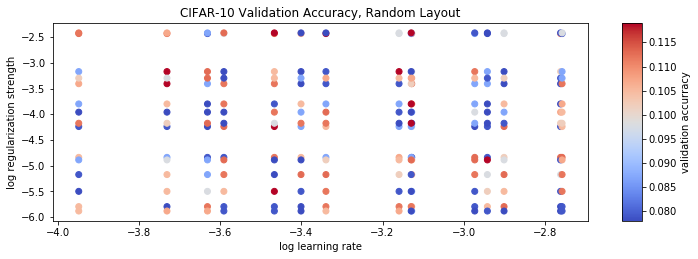

In [118]:
# Visualize the cross-validation results of the val_accuracy in results
import math
from matplotlib import cm

x_scatter = [math.log10(x[0]) for x in results]     # log scale; learning_rate
y_scatter = [math.log10(x[1]) for x in results]     # log scale; regularization_strength

# Plot validation accuracy
colors = [results[x][1] for x in results]           # results[x][1] is val_accuracy which determines the color
plt.subplot(2, 1, 2)
p = plt.scatter(x_scatter, y_scatter, c=colors, cmap=cm.coolwarm)

# Add a color bar which maps values to colors.
cbar = plt.colorbar(p, aspect=10)
cbar.set_label('validation accurracy')

# Labels
plt.xlabel('log learning rate')
plt.ylabel('log regularization strength')
plt.title('CIFAR-10 Validation Accuracy, Random Layout')
plt.show()

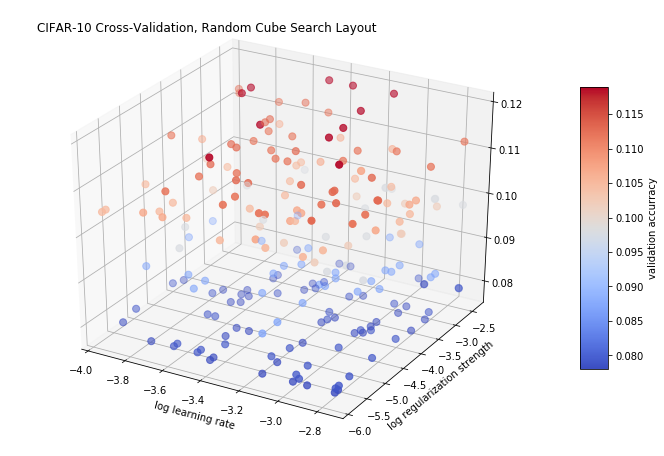

In [119]:
# Visualize the cross-validation results in 3D. Note the other history buffers returned from train() in stats.
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Get the X, Y, Z data. 
X = [math.log10(x[0]) for x in results]     # log scale; learning_rate
Y = [math.log10(x[1]) for x in results]     # log scale; regularization_strength
Z = [results[x][1] for x in results]        # normal scale; val_accuracy

# Scatter-3D plot
p = ax.scatter(X, Y, Z, c=Z, s=50, cmap=cm.coolwarm)   # s is the dot size

# Add a color bar which maps values to colors.
cbar = plt.colorbar(p, shrink=0.65, aspect=10)
cbar.set_label('validation accurracy')

# Labels
ax.set_xlabel('log learning rate')
ax.set_ylabel('log regularization strength')
#ax.set_zlabel('validation accurracy')
ax.text2D(0.05, 0.95, "CIFAR-10 Cross-Validation, Random Cube Search Layout", fontsize=12, transform=ax.transAxes)
plt.show()

Initial training loss (Softmax/CE expect: -ln(1/num_classes) = -ln(0.1) = 2.302): 2.302585
Final training loss: 2.302611


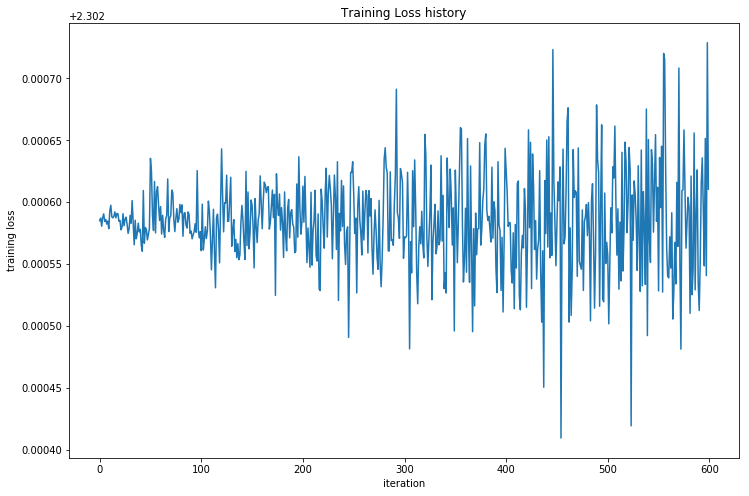

In [120]:
# As a sanity check, make sure your initial loss is reasonable
print('Initial training loss (Softmax/CE expect: -ln(1/num_classes) = -ln(0.1) = 2.302): %f' 
      % (best_stats['loss_history'][0]))

print('Final training loss: %f' % (best_stats['loss_history'][-1]))

# plot the loss history
plt.plot(best_stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

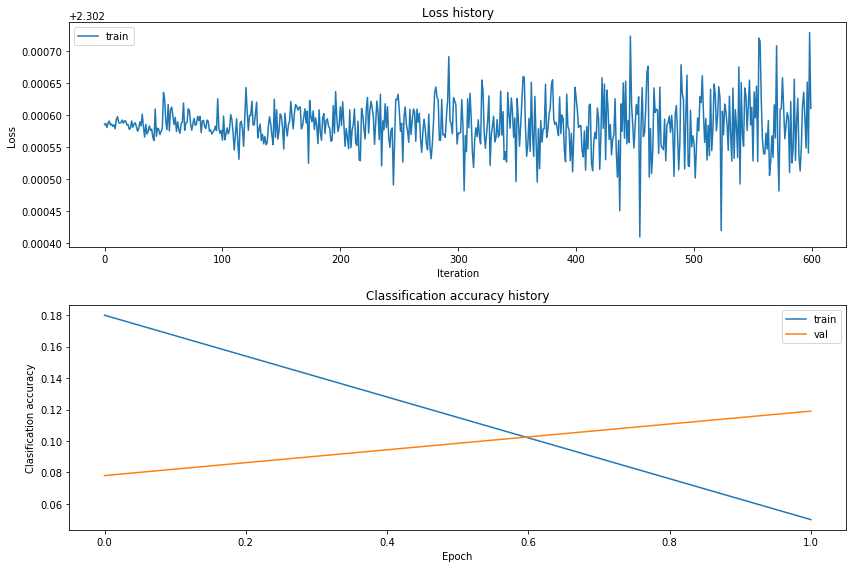

In [121]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(best_stats['loss_history'], label='train')
plt.legend()
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(best_stats['train_acc_history'], label='train')
plt.plot(best_stats['val_acc_history'], label='val')
plt.legend()
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.tight_layout()                 # control extra padding around the figure border to avoid overlapping labels
plt.show()

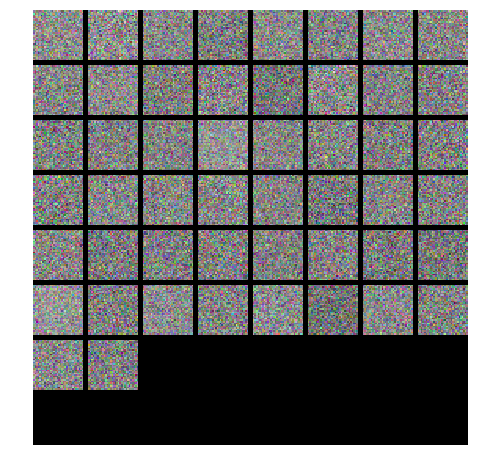

In [122]:
# visualize the weights of the best network
show_net_weights(best_net)

# Run on the test set
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 48%.

**We will give you extra bonus point for every 1% of accuracy above 52%.**

In [123]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.089
